# Regresion Logistica implementacion caso bancaria

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
data = pd.read_csv("/Users/luisalberto/Documents/Projects/datasets/bank/bank.csv", sep=";")

In [129]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [130]:
data["y"] = (data["y"]=="yes").astype(int) #se cambio la informacion de yes o no por 1 o 0

In [131]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.958,5228.1,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.959,5228.1,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,...,2,999,1,failure,-1.8,92.893,-46.2,1.354,5099.1,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
4118,34,management,single,high.school,no,yes,no,cellular,nov,wed,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0


In [132]:
data["education"].unique() #obtener los datos que llenan una columna

array(['basic.9y', 'high.school', 'university.degree',
       'professional.course', 'basic.6y', 'basic.4y', 'unknown',
       'illiterate'], dtype=object)

In [133]:
data["education"] = np.where(data["education"]=="basic.4y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.6y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="basic.9y", "Basic", data["education"])
data["education"] = np.where(data["education"]=="high.school", "High School", data["education"])
data["education"] = np.where(data["education"]=="professional.course", "Professional Course", data["education"])
data["education"] = np.where(data["education"]=="university.degree", "University Degree", data["education"])

In [134]:
data["education"].unique()

array(['Basic', 'High School', 'University Degree', 'Professional Course',
       'unknown', 'illiterate'], dtype=object)

In [135]:
data["y"].value_counts()

0    3668
1     451
Name: y, dtype: int64

In [136]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,,
Basic,42.337124,253.898457,2.429732,978.815597,0.149472,0.237368,93.658600,-41.120552,3.775701,5174.133144,0.079610
High School,38.097720,258.534202,2.630836,958.022801,0.206298,-0.002497,93.564314,-40.995765,3.511732,5163.212595,0.105320
Professional Course,40.207477,278.816822,2.512150,958.211215,0.194393,0.163925,93.599630,-40.127664,3.701426,5167.595140,0.121495
University Degree,39.017405,247.707278,2.583070,947.900316,0.207278,-0.009731,93.499109,-39.830063,3.547132,5163.023180,0.130538
illiterate,42.000000,146.000000,4.000000,999.000000,0.000000,-2.900000,92.201000,-31.400000,0.834000,5076.200000,0.000000
unknown,42.826347,267.281437,2.538922,939.700599,0.263473,-0.074251,93.637455,-39.487425,3.410174,5151.260479,0.155689


Text(0, 0.5, 'Frecuencia de compra del producto')

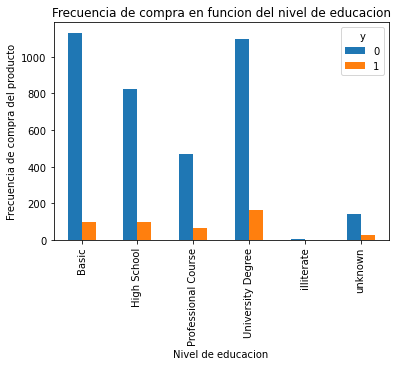

In [23]:
%matplotlib inline
pd.crosstab(data.education, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del nivel de educacion")
plt.xlabel("Nivel de educacion")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Proporcion de clientes')

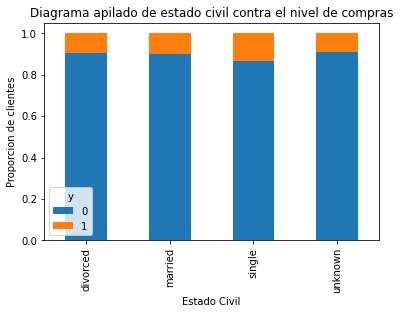

In [24]:
table=pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Diagrama apilado de estado civil contra el nivel de compras")
plt.xlabel("Estado Civil")
plt.ylabel("Proporcion de clientes")

Text(0, 0.5, 'Frecuencia de compra del producto')

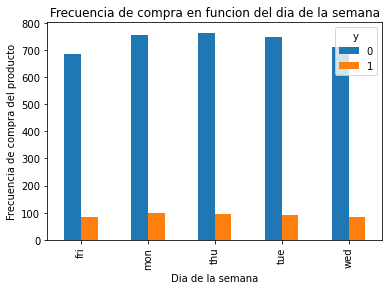

In [25]:
%matplotlib inline
pd.crosstab(data.day_of_week, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del dia de la semana")
plt.xlabel("Dia de la semana")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

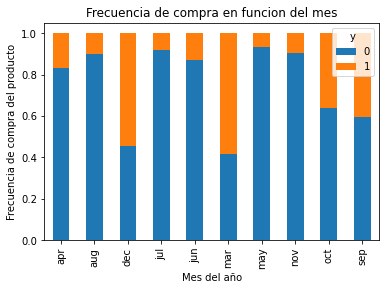

In [26]:
table=pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title("Frecuencia de compra en funcion del mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

Text(0, 0.5, 'Frecuencia de compra del producto')

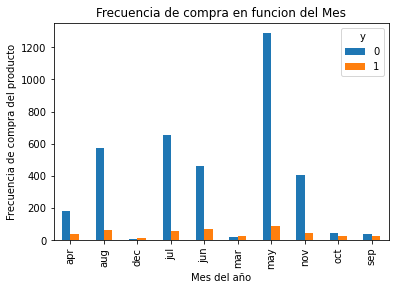

In [27]:
%matplotlib inline
pd.crosstab(data.month, data.y).plot(kind="bar")
plt.title("Frecuencia de compra en funcion del Mes")
plt.xlabel("Mes del año")
plt.ylabel("Frecuencia de compra del producto")

<AxesSubplot:xlabel='age'>

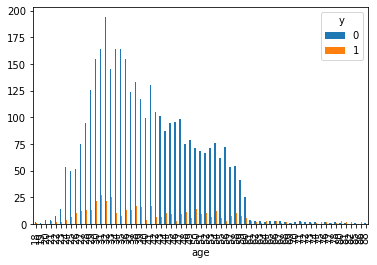

In [28]:
pd.crosstab(data.age, data.y).plot(kind="bar")

### Conversion de las variables categoricas a dummies

In [137]:
categories = ["job", "marital", "education", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

In [138]:
for category in categories:
    cat_list ="cat" + "_" + category
    cat_dummies = pd.get_dummies(data[category], prefix=category)
    data_new = data.join(cat_dummies)
    data = data_new

In [139]:
data_vars = data.columns.values.tolist()

In [140]:
to_keep = [v for v in data_vars if v not in categories]
to_keep = [v for v in data_vars if v not in ["default"]]

In [141]:
bank_data = data[to_keep]
bank_data.columns.values

array(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_Basic',
       'education_High School', 'education_Professional Course',
       'education_University Degree', 'education_illiterate',
       'education_unknown', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       '

In [142]:
bank_data_vars = bank_data.columns.values.tolist()
Y = ['y']
X = [v for v in bank_data_vars if v not in Y]

## Seleccion de rasgos para el modelo

In [143]:
n = 12

In [144]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [145]:
lr = LogisticRegression()

In [149]:
rfe = RFE(lr,step = 12)
rfe = rfe.fit(bank_data[X], bank_data[Y].values.ravel())

ValueError: could not convert string to float: 'blue-collar'

# Implementacion del modelo de Python con statsmodel.api 

In [150]:
import statsmodels.api as sm